In [1]:
import warnings 
warnings.filterwarnings("ignore")

import sys
sys.dont_write_bytecode = True

In [2]:
import pandas as pd
import numpy as np

from algorithms.clustering import hierarchical, kmeans , dbscan
from algorithms.associate_rule_mining import apriori, fpgrowth

import utils.clustering as clustering_utils
import utils.forecasting as forecasting_utils
import utils.comparison as comparison_utils

In [3]:
ecommerce_df = pd.read_csv("./data/e-commerce-data.csv", encoding= 'unicode_escape')

In [4]:
clustering_df = clustering_utils.preprocess(ecommerce_df)
clustering_data   = clustering_utils.get_data(clustering_df)
kmeans_model = kmeans.KMeans()
kmeans_labels = kmeans_model.get_labels(clustering_data)
# kmeans_model.fit(clustering_data)
# kmeans_labels = kmeans_model.predict(clustering_data)

# dbscan_model = dbscan.DBSCAN(eps=0.3, min_samples=5)
# dbscan_labels = dbscan_model.fit(clustering_data)

# hierarchical_model = hierarchical.HierarchicalClustering(n_clusters=2)
# hierarchical_model.fit(clustering_data)
# hierarchial_labels = hierarchical_model.predict(clustering_data)

Total number of outliers is: 434


In [5]:
print(kmeans_labels)

[1 0 2 ... 3 3 2]


In [6]:
customer_clusters_kmeans, customer_clusters_dbscan, customer_clusters_hierarchial = clustering_df, clustering_df, clustering_df
customer_clusters_kmeans['Cluster'] = kmeans_labels
customer_clusters_dbscan['Cluster'] = kmeans_labels
customer_clusters_hierarchial['Cluster'] = kmeans_labels

In [7]:
customer_clusters = comparison_utils.get_best_clusters(ecommerce_df, customer_clusters_kmeans, customer_clusters_dbscan, customer_clusters_hierarchial)

d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalpe

best cluster by kmeans


In [ ]:
print(hello)

In [8]:
apriori_model = apriori.Apriori()
associate_rules_apriori = apriori_model.get_associate_rules(ecommerce_df, customer_clusters)

fp_growth_model =fpgrowth.Fpgrowth()
associate_rules_fp_growth = fp_growth_model.get_associate_rules(ecommerce_df, customer_clusters)

associate_rules = comparison_utils.get_best_associate_rules(associate_rules_apriori, associate_rules_fp_growth)

d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalpe

                                           antecedents  \
0                         (ALARM CLOCK BAKELIKE GREEN)   
1                           (ALARM CLOCK BAKELIKE RED)   
2                      (ASSORTED COLOUR BIRD ORNAMENT)   
3                       (PAINTED METAL PEARS ASSORTED)   
4                      (ASSORTED COLOUR BIRD ORNAMENT)   
..                                                 ...   
835  (RED SPOT CERAMIC DRAWER KNOB, WHITE SPOT RED ...   
836                   (RED STRIPE CERAMIC DRAWER KNOB)   
837              (WHITE SPOT BLUE CERAMIC DRAWER KNOB)   
838                     (RED SPOT CERAMIC DRAWER KNOB)   
839               (WHITE SPOT RED CERAMIC DRAWER KNOB)   

                                           consequents zhang metric1  
0                           (ALARM CLOCK BAKELIKE RED)      0.100829  
1                         (ALARM CLOCK BAKELIKE GREEN)      0.100829  
2                       (PAINTED METAL PEARS ASSORTED)      0.257172  
3                  

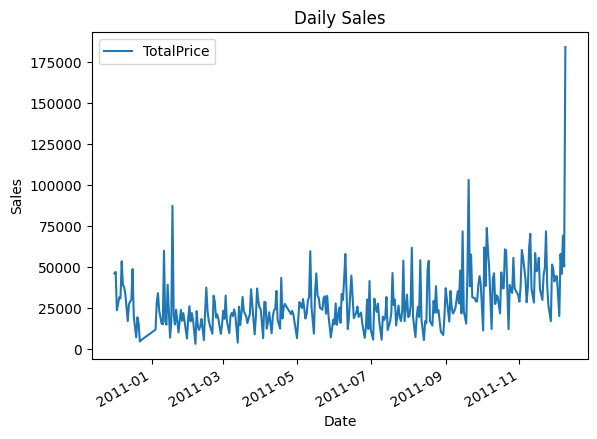

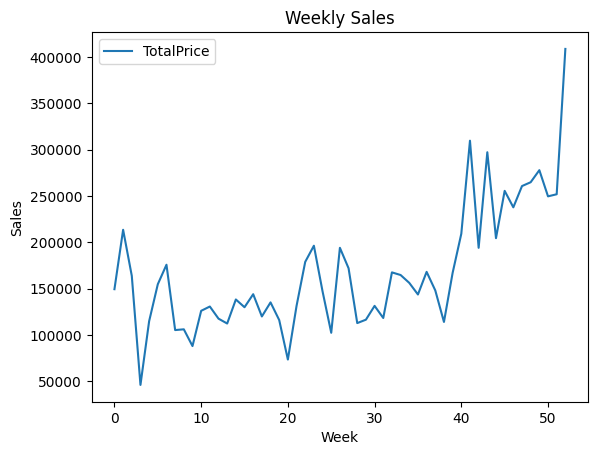

In [9]:
forecasting_df = forecasting_utils.preprocess(ecommerce_df)
forecasting_utils.visualize(forecasting_df)